#Sklearn Implementation


Accuracy on test set: 90.00%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



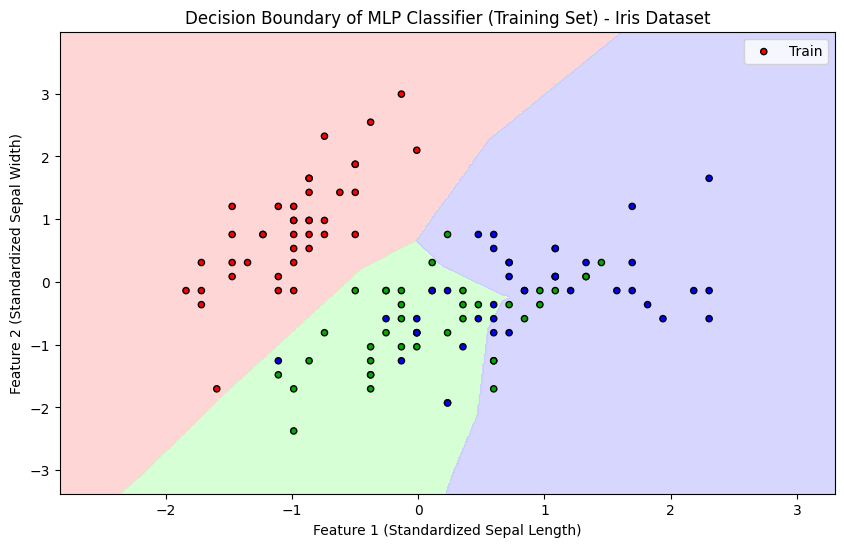

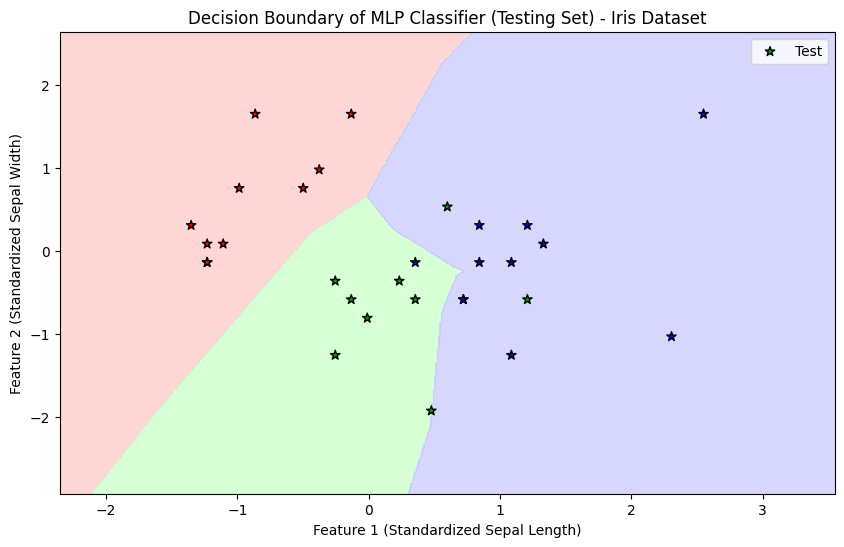

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Load the Iris dataset
data = load_iris()
# For 2D visualization, select the first two features: sepal length and sepal width
X = data.data[:, :2]
y = data.target  # 0: setosa, 1: versicolor, 2: virginica

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features so that they have mean=0 and variance=1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define and train the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = mlp.predict(X_test)
print("Accuracy on test set: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Define color maps for three classes
cmap_light = ListedColormap(['#FFCCCC', '#CCFFCC', '#CCCCFF'])
cmap_bold = ListedColormap(['#FF0000', '#00AA00', '#0000FF'])

# --- Plot decision boundaries for the Training Set ---
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z_train = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z_train = Z_train.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z_train, alpha=0.8, cmap=cmap_light)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold,
            edgecolor='k', s=20, label='Train')
plt.title("Decision Boundary of MLP Classifier (Training Set) - Iris Dataset")
plt.xlabel("Feature 1 (Standardized Sepal Length)")
plt.ylabel("Feature 2 (Standardized Sepal Width)")
plt.legend()
plt.show()

# --- Plot decision boundaries for the Testing Set ---
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z_test = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z_test = Z_test.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z_test, alpha=0.8, cmap=cmap_light)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold,
            edgecolor='k', s=50, marker='*', label='Test')
plt.title("Decision Boundary of MLP Classifier (Testing Set) - Iris Dataset")
plt.xlabel("Feature 1 (Standardized Sepal Length)")
plt.ylabel("Feature 2 (Standardized Sepal Width)")
plt.legend()
plt.show()


In [2]:
from sklearn.metrics import confusion_matrix

# Compute the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print the classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# (Optional) Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Accuracy: 90.00%

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

Confusion Matrix:
[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]


#Keras Implementation (Wine Dataset)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.3284 - loss: 1.0830 - val_accuracy: 0.6667 - val_loss: 0.9287
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6639 - loss: 0.9132 - val_accuracy: 0.8611 - val_loss: 0.7815
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8756 - loss: 0.7433 - val_accuracy: 0.8611 - val_loss: 0.6374
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9209 - loss: 0.5836 - val_accuracy: 0.9167 - val_loss: 0.4910
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9586 - loss: 0.4375 - val_accuracy: 0.9444 - val_loss: 0.3686
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9771 - loss: 0.3195 - val_accuracy: 0.9444 - val_loss: 0.2709
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9711 - loss: 0.2452 - val_accuracy: 0.9444 - val_loss: 0.2075
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9817 - loss: 0.1797 - val_accuracy: 0.9722 - val_loss: 0.1617


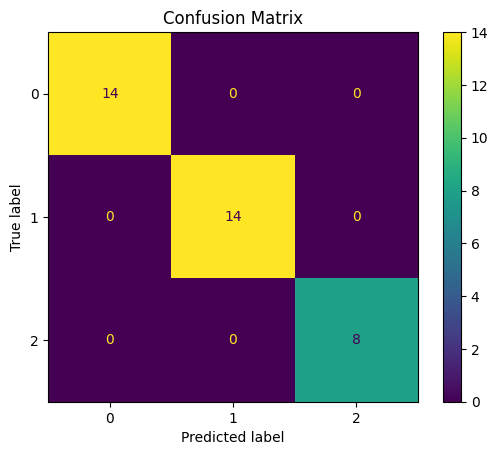

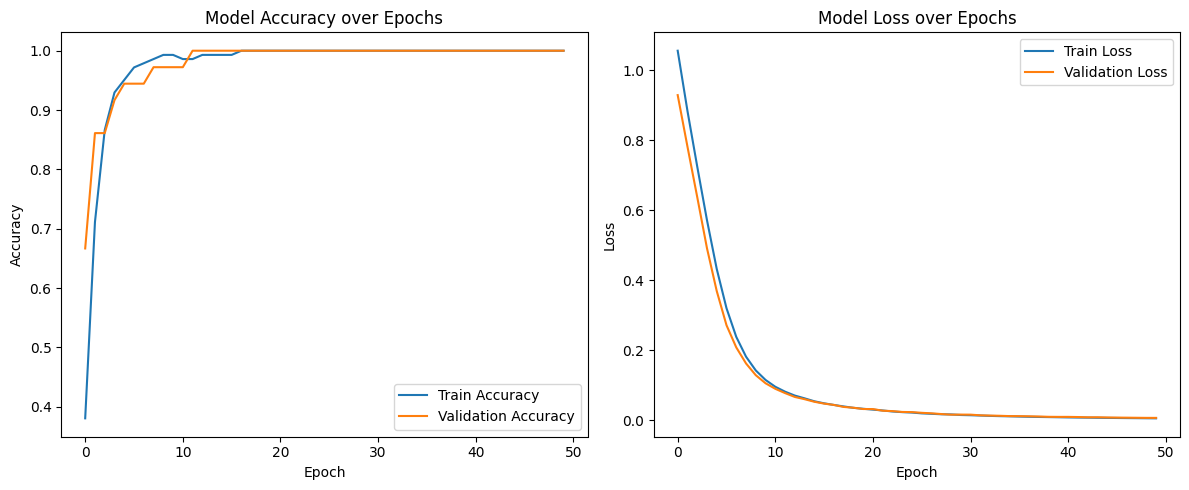

In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from tensorflow.keras.utils import to_categorical

# Load the Wine dataset
wine = load_wine()
X = wine.data  # Features
y = wine.target  # Labels

# Convert labels to categorical (One-Hot Encoding)
y = to_categorical(y, num_classes=3)  # 3 classes in the Wine dataset

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (normalize features)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the neural network model
model = Sequential([
    Dense(32, activation='relu', input_dim=X_train.shape[1]),  # Input layer
    Dense(16, activation='relu'),  # Hidden layer
    Dense(3, activation='softmax')  # Output layer with 3 neurons (multi-class classification)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=8,
                    validation_data=(X_test, y_test), verbose=1)

# -------------------------------
# Evaluation and Reporting Section
# -------------------------------

# Evaluate the model on the test set
loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")

# Generate predictions on the test set
y_pred = model.predict(X_test)

# Convert one-hot encoded labels back to class indices
y_true = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print the classification report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred_classes))

# Display the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_true, y_pred_classes)
plt.title("Confusion Matrix")
plt.show()

# -------------------------------
# Plot Training History
# -------------------------------
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()



In [4]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc * 100:.2f}%")


Test Loss: 0.0061
Test Accuracy: 100.00%


In [5]:
# Predict class probabilities on the test data
y_pred_probabilities = model.predict(X_test)

# Convert predicted probabilities to class labels by taking the index with the highest probability
y_pred_classes = np.argmax(y_pred_probabilities, axis=1)

# Convert the one-hot encoded true labels back to class indices
y_test_classes = np.argmax(y_test, axis=1)

# Optionally, print the first few predictions and true labels to verify
print("Predicted classes:", y_pred_classes[:10])
print("True classes:     ", y_test_classes[:10])


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted classes: [0 0 2 0 1 0 1 2 1 2]
True classes:      [0 0 2 0 1 0 1 2 1 2]


Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



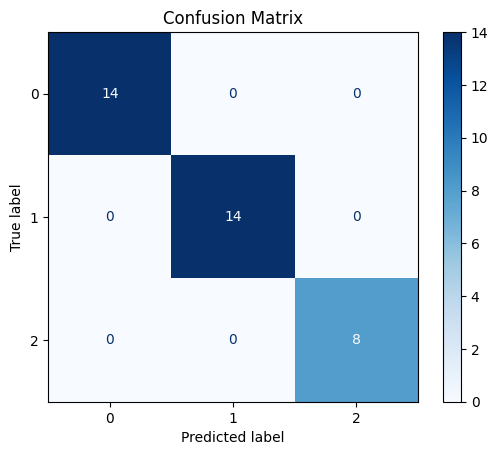

In [6]:
# Display the classification report.
# If the target names from the Wine dataset are available, you can include them for clarity.
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes, target_names=wine.target_names))

# Display the confusion matrix with a blue colormap for enhanced visual clarity.
ConfusionMatrixDisplay.from_predictions(y_test_classes, y_pred_classes, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


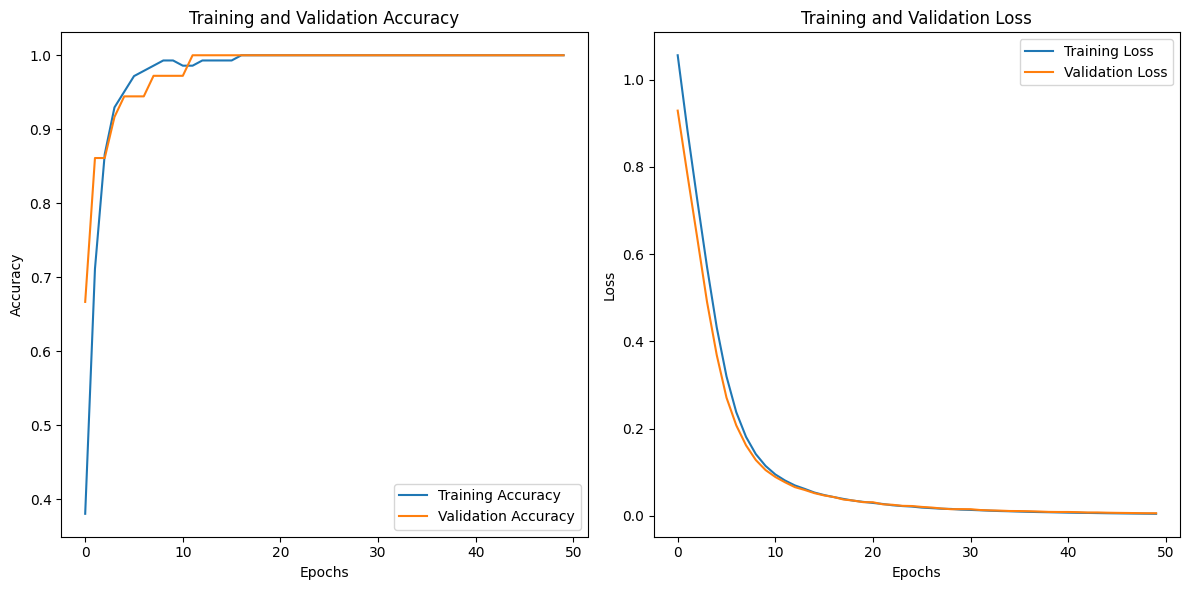

In [9]:
# Step 9: Plot Training and Validation Loss/Accuracy
# Extract metrics from the history object (collected during training)
acc = history.history['accuracy']        # Training accuracy
val_acc = history.history['val_accuracy']  # Validation accuracy
loss = history.history['loss']           # Training loss
val_loss = history.history['val_loss']   # Validation loss

# Plot Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Create the first subplot for accuracy
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')  # Add a title
plt.xlabel('Epochs')                           # Label the x-axis
plt.ylabel('Accuracy')                         # Label the y-axis
plt.legend()                                   # Add a legend

# Plot Loss
plt.subplot(1, 2, 2)  # Create the second subplot for loss
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')      # Add a title
plt.xlabel('Epochs')                           # Label the x-axis
plt.ylabel('Loss')                             # Label the y-axis
plt.legend()                                   # Add a legend

# Adjust layout to prevent overlap and display the plots
plt.tight_layout()
plt.show()




#Back Propogation (Wine dataset)

Epoch 0, Loss: 0.4797
Epoch 50, Loss: 0.2757
Epoch 100, Loss: 0.2316
Epoch 150, Loss: 0.2071
Epoch 200, Loss: 0.1868
Epoch 250, Loss: 0.1678
Epoch 300, Loss: 0.1505
Epoch 350, Loss: 0.1353
Epoch 400, Loss: 0.1224
Epoch 450, Loss: 0.1117


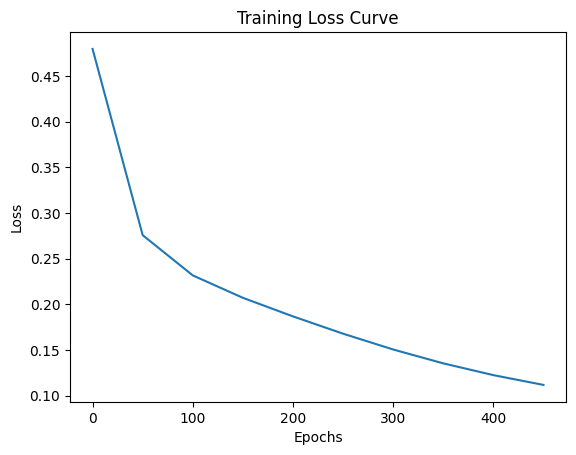

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features (4 features for Iris)
y = iris.target  # Labels (0, 1, 2)

# Convert labels to one-hot encoding
y_one_hot = np.zeros((y.size, y.max() + 1))
y_one_hot[np.arange(y.size), y] = 1

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Normalize the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize network parameters
input_neurons = X_train.shape[1]  # 4 features for Iris
hidden_neurons = 8
output_neurons = 3  # 3 classes in Iris
np.random.seed(42)
weights_input_hidden = np.random.randn(input_neurons, hidden_neurons)
weights_hidden_output = np.random.randn(hidden_neurons, output_neurons)
bias_hidden = np.zeros((1, hidden_neurons))
bias_output = np.zeros((1, output_neurons))
learning_rate = 0.01
epochs = 500
losses = []

# Activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Training loop
for epoch in range(epochs):
    # Forward pass
    hidden_layer_input = np.dot(X_train, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)
    final_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    final_output = sigmoid(final_layer_input)

    # Compute error
    error = y_train - final_output

    # Backpropagation
    d_output = error * sigmoid_derivative(final_output)
    error_hidden = d_output.dot(weights_hidden_output.T)
    d_hidden = error_hidden * sigmoid_derivative(hidden_layer_output)

    # Update weights and biases
    weights_hidden_output += hidden_layer_output.T.dot(d_output) * learning_rate
    weights_input_hidden += X_train.T.dot(d_hidden) * learning_rate
    bias_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate
    bias_hidden += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

    # Store and print loss every 50 epochs
    if epoch % 50 == 0:
        loss = np.mean(np.abs(error))
        losses.append(loss)
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Testing the network
hidden_layer_input = np.dot(X_test, weights_input_hidden) + bias_hidden
hidden_layer_output = sigmoid(hidden_layer_input)
final_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
final_output = sigmoid(final_layer_input)

predictions = np.argmax(final_output, axis=1)
y_true = np.argmax(y_test, axis=1)

# Plot the training loss curve
plt.plot(range(0, epochs, 50), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()
